# Capstone Project

Brendan McShane



Question 1: Are the (roughly) continuous variables within the total data normally distributed? If not, are they normally distributed within disease state? 

Making a scatter matrix of the continuous variables should answer these questions.

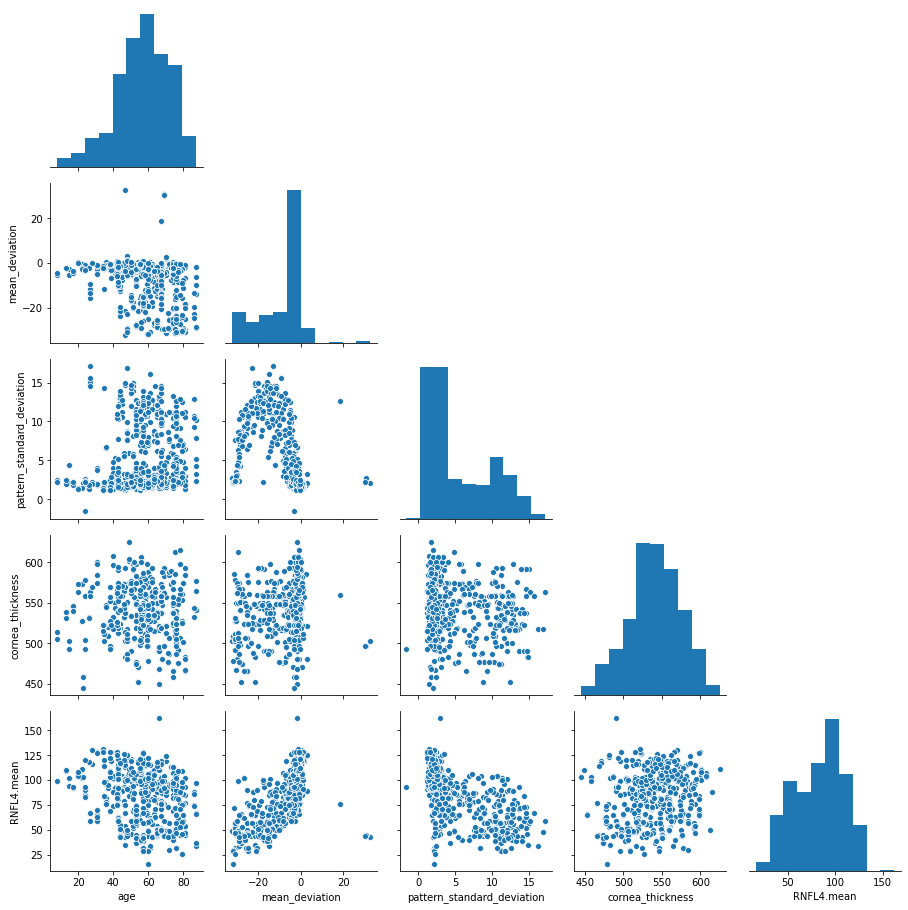

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import seaborn as sns

whole_dataset = 'data/ds_whole.csv'

df = pd.read_csv(whole_dataset)
#read in the whole dataset

df_cont = df[['age', 'mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#subset into the (roughly) continuous variables only

sns.pairplot(df_cont, corner = "true")
#plot the scatter matrix of the continuous variables. I used seaborn because I like the default look of it better.


Based on the scatter matrix above, age, cornea thickness, and to some extent RNFL4.mean seems to be roughly normally distibuted by eye.

Both deviation variables do not seem to be normally distiributed, and are instead highly skewed. I'll split up these data into disease vs. healthy and repeat the scatter matrix plotting to see if those look better.


In [6]:
#A value of 1 in the glaucoma series indicates presence of the disease while 0 indicates absence.
df_disease =  df[ df['glaucoma'] == 1 ]
df_healthy = df[ df['glaucoma'] == 0 ]
#Subset data into healthy vs. disease
df_healthy_cont = df_healthy[['age','mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
df_disease_cont = df_disease[['age','mean_deviation', 'pattern_standard_deviation', 'cornea_thickness', 'RNFL4.mean']]
#Subset just the continuous variables again

print('Disease scatter matrix')


Disease scatter matrix


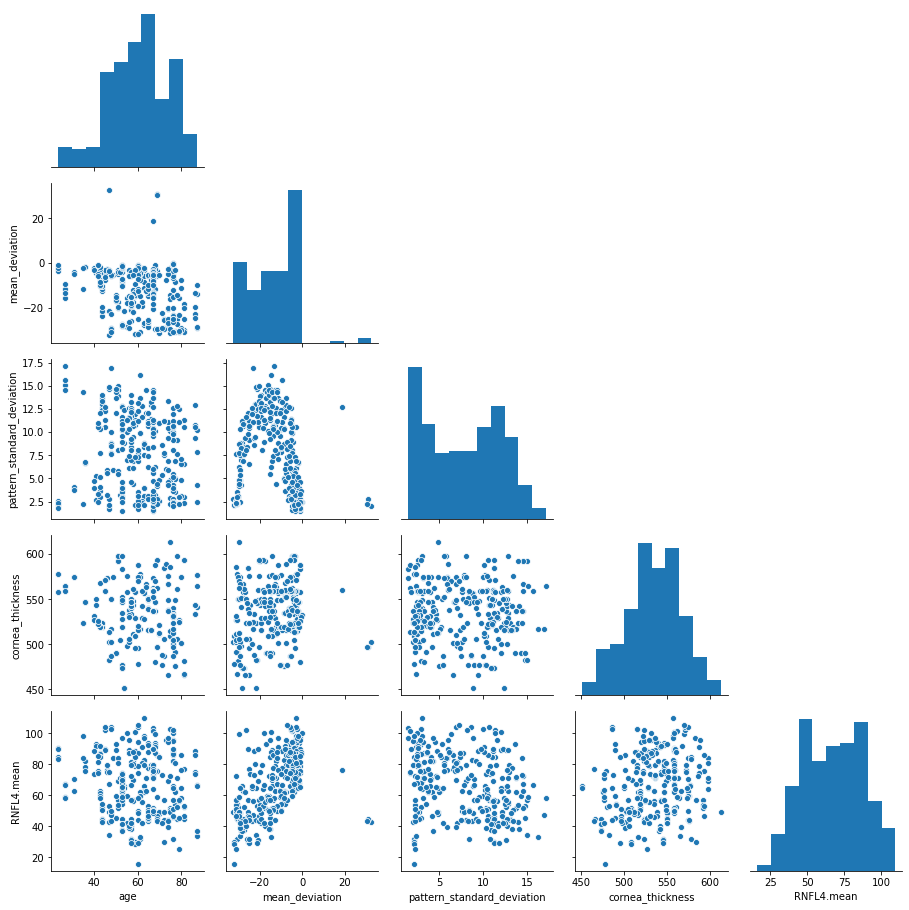

In [14]:
 sns.pairplot(df_disease_cont, corner = "true")

Healthy scatterplot

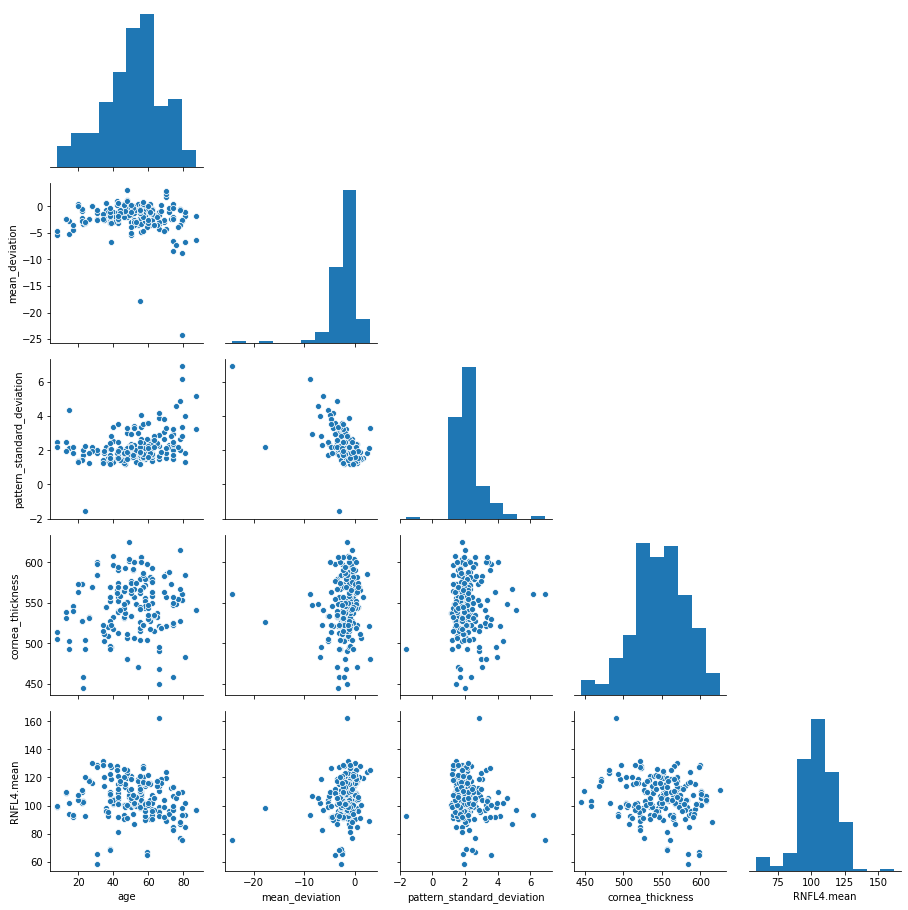

In [15]:
 sns.pairplot(df_healthy_cont, corner = "true")